In [87]:
from __future__ import division

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import finance

%matplotlib inline

# Loading and Exploring the Data

In [2]:
data = pd.read_csv('WIKI_20160608.csv', names=['Ticker', 'Date', 'Open', 'High', 'Low', 'Close',
                                              'Volume', '7', '8', 'Adj-O', 'Adj-H', 'Adj-L', 'Adj-C',
                                              'Adj-Vol'])

In [3]:
data.head()

,Ticker,Date,Open,High,Low,Close,Volume,7,8,Adj-O,Adj-H,Adj-L,Adj-C,Adj-Vol
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,43.584507,47.895063,38.316050,42.147655,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,41.132280,41.189754,38.134049,38.680053,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,39.570901,42.147655,38.373524,42.147655,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,40.710803,41.793232,38.555525,38.555525,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,38.440577,40.174379,38.316050,39.331425,3464400.0


Create a new dataframe with only the adjusted data, data, & ticker symbol.

In [4]:
dat = data[['Ticker', 'Date', 'Adj-O', 'Adj-H', 'Adj-L', 'Adj-C', 'Adj-Vol']]

In [5]:
print dat.head()
print dat.shape

  Ticker        Date      Adj-O      Adj-H      Adj-L      Adj-C     Adj-Vol
0      A  1999-11-18  43.584507  47.895063  38.316050  42.147655  44739900.0
1      A  1999-11-19  41.132280  41.189754  38.134049  38.680053  10897100.0
2      A  1999-11-22  39.570901  42.147655  38.373524  42.147655   4705200.0
3      A  1999-11-23  40.710803  41.793232  38.555525  38.555525   4274400.0
4      A  1999-11-24  38.440577  40.174379  38.316050  39.331425   3464400.0
(14150093, 7)


In [6]:
agilent = dat[dat['Ticker'] == 'A']

In [7]:
agilent.head()

,Ticker,Date,Adj-O,Adj-H,Adj-L,Adj-C,Adj-Vol
0,A,1999-11-18,43.584507,47.895063,38.316050,42.147655,44739900.0
1,A,1999-11-19,41.132280,41.189754,38.134049,38.680053,10897100.0
2,A,1999-11-22,39.570901,42.147655,38.373524,42.147655,4705200.0
3,A,1999-11-23,40.710803,41.793232,38.555525,38.555525,4274400.0
4,A,1999-11-24,38.440577,40.174379,38.316050,39.331425,3464400.0


Create an array of ticker symbols

In [8]:
tickers = dat['Ticker']
tickers = tickers.unique()
len(tickers)

3179

In [9]:
a_20 = agilent.iloc[-21:]

In [10]:
a_20.columns

Index([u'Ticker', u'Date', u'Adj-O', u'Adj-H', u'Adj-L', u'Adj-C', u'Adj-Vol'], dtype='object')

In [11]:
a_20

,Ticker,Date,Adj-O,Adj-H,Adj-L,Adj-C,Adj-Vol
4142,A,2016-05-10,41.50,42.000,41.3500,42.00,2094305.0
4143,A,2016-05-11,42.19,43.200,42.1200,42.46,3316017.0
4144,A,2016-05-12,42.59,42.940,42.4200,42.73,2224503.0
4145,A,2016-05-13,42.55,42.930,42.3900,42.62,2423939.0
4146,A,2016-05-16,42.61,43.070,42.5000,42.94,3797878.0
4147,A,2016-05-17,44.96,45.340,43.6300,44.41,7127081.0
4148,A,2016-05-18,44.45,44.740,43.9900,44.32,2973827.0
4149,A,2016-05-19,44.07,44.820,43.9750,44.56,3659486.0
4150,A,2016-05-20,44.86,45.220,44.6900,44.89,2567352.0
4151,A,2016-05-23,44.89,44.960,44.5300,44.57,1689745.0


## Ticker Function

In [12]:
def tick_gettr(ticker):
    data = dat[dat['Ticker'] == ticker]
    return data

In [31]:
aapl = tick_gettr('AAPL')

# Basic Calculations

I need the components and then the look back period.

Also note that the calculations need to be made for the data historically, not just for the look back period (e.g. look back of 14 days gives us a value just for those 14 days.)  The look back period is how far back the function will look back to make the calculation.

**EXAMPLE:**

Using a lookback period of 14 days will gives us the 14 day calculation for RSI for the entire history of the data set, not just the last 14 days.  I will be able to look & see what the 14 day RSI was for June 25th, 2000 and for the most recent data point as well.

In [32]:
def rs(ticker, look_back):
    """
    A function to find the relative strength of a stock using a user specified
    look back period.
    """
    
    #Get the difference between consecutive adjusted closes.
    difference = ticker['Adj-C'].diff()
    difference = difference[1:]
    
    #Define & clean up the up sessions & down sessions.
    up, down = difference.copy(), difference.copy()
    
    up[up < 0] = 0
    down[down > 0] = 0
    
    #Get the absolute value for the down sessions.
    down = down.abs()
    
    #Get the look_back mean for both up & down sessions.
    upper = up.rolling(window=look_back, center=False).mean()
    downer = down.rolling(window=look_back, center=False).mean()
        
    #Calculate the relative strength
    rs = upper / downer
    
    return rs

In [33]:
def rsi(ticker, look_back):
    """
    A function that determines the relative strength index of a specific stock.
    """
    
    #Get the relative strength.
    r_s = rs(ticker, look_back)
    #Calculate the RSI.
    rsi = 100.0 - 100.0 / (1.0 + r_s)

    return rsi.round(decimals=2)

The Python code to get the RS calculation was greatly informed from this StackOverflow answer:

http://stackoverflow.com/a/29400434/1094634

Also important to note, that some sources will calculate some element of the RSI differently.  Yahoo Finance & ThinkorSwim for instances calculate it the same (and differently from the above calculation) while Freestockcharts.com (Worden) calculates it the same way.

### This should be done a bit later. [Data visualization]
[ ] Include dates with the RSI output

[ ] Graph of the price history

[ ] Graph of the RSI

## Buy/Sell Rule:

I will begin with a simple buy/sell rule.  Buy @ the closing price when RSI < 30 & sell when RSI > 70.  30/70 are the traditional demarcation points for 'oversold' (<30) & 'overbought' (>70).  These thresholds are ripe for fine tuning, furthermore, the buy/sell rule itself also needs to be tested.  Initially, I will be using the 14 day average.  The other average that I want to look at is the 9 day.  As with the oversold/overbought level, the optimal average needs to be tested/tuned as well.

In [34]:
aapl_rsi = rsi(aapl, 14)

In [35]:
AAPL = zip(aapl_rsi, aapl['Date'], aapl['Adj-C'])

In [36]:
len(AAPL)

8948

In [37]:
AAPL[14]

(64.5, '1981-01-05', 0.5118863780806)

## ML

In [38]:
from sklearn import cross_validation

### Train and test data

Add RSI column to our data set

In [39]:
aapl['RSI'] = aapl_rsi

/Users/amagi/anaconda/envs/mlnd/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Drop the first 14 rows with NaNs in the RSI.

In [40]:
aapl = aapl[14:]

In [41]:
aapl_features = aapl[['Adj-O', 'Adj-H', 'Adj-L', 'Adj-Vol', 'RSI']]
aapl_predict = aapl['Adj-C']

Test sets

In [48]:
test = aapl_features.iloc[7148:]
pred_test = aapl_predict.iloc[7148:]

Training sets

In [50]:
train = aapl_features.iloc[:7148]
pred_train = aapl_predict.iloc[:7148]

## Linear Regression

Running a simple, naive implementation of linear regression.

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
aapl_regr = LinearRegression()

In [69]:
aapl_regr.fit(train, pred_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
predictions_aapl = aapl_regr.predict(test)
print predictions_aapl

[  17.37432703   17.23894991   16.96666506 ...,  100.92173449   99.44816568
   99.11229292]


In [75]:
aapl_regr.score(test, pred_test)

0.99981783502231891

**Residual sum of squares error.**

In [76]:
np.mean((predictions_aapl - pred_test) ** 2)

0.17385094710674756

Make a chart of the predicted prices & actual prices

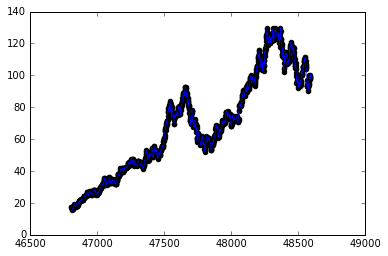

In [89]:
plt.scatter(test.index, pred_test, color='black')
plt.plot(test.index, predictions_aapl, color='blue', linewidth=.5)

Yup, we have overfitting.

Just to confirm visually, I will use the last 300 observations in the test sets.

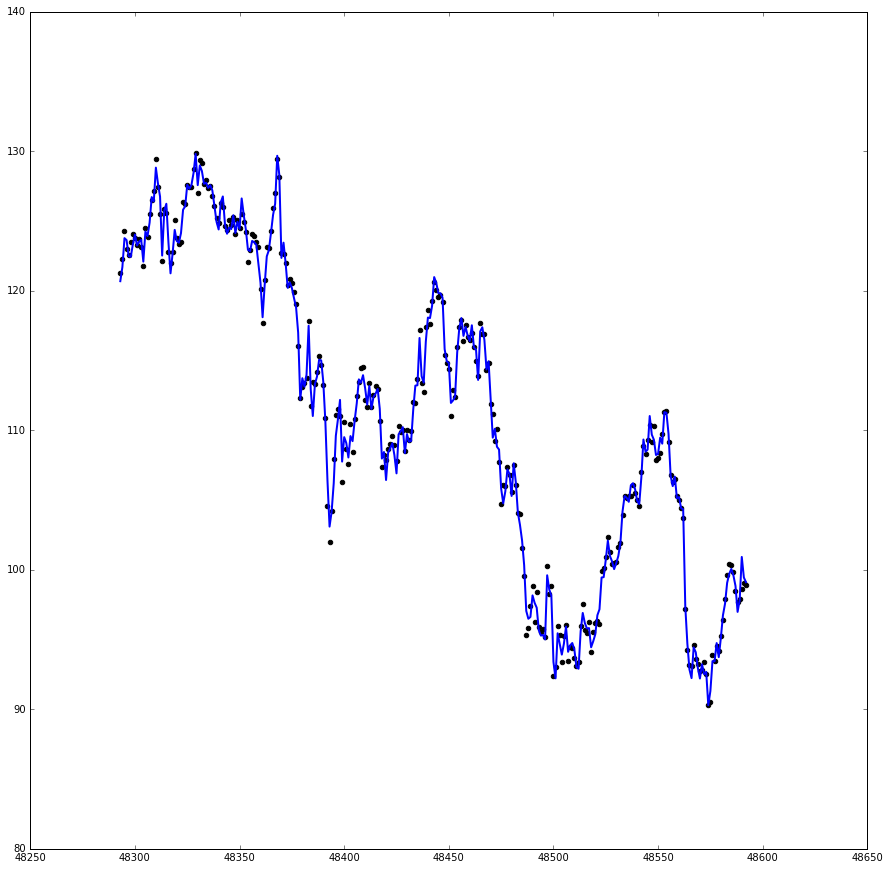

In [103]:
plt.figure(figsize=(15,15))
plt.scatter(test.index[-300:], pred_test.iloc[-300:], color='black')
plt.plot(test.index[-300:], predictions_aapl[-300:], color='blue', linewidth=2)

A clearer visualization of how the data has been overfit.

## This is a backtesting approach, which will be use to see how the predictions worked out.

In [39]:
def rsi_buy_sell(ticker, oversold, overbought):
    """
    A function that buys a user selected stock using the RSI with user selected
    buy & sell thresholds.
    """
    
    ##I need(?) to create, possibly, a dict that looks like:
    ##{buy: ('1981-01-05', 0.5118863780806), sell: ('1981-01-05', 0.5118863780806), profit: (buy[2] - sell[2])}
    
    #A list of transactions
    transactions = []
    #A dict that records the buy, sell, & profit of each transaction
    buy_sell = {buy: ('1981-01-05', 0.0), sell: ('1981-01-05', 0.0),
                 profit: (buy[2] - sell[2])}
    
    buy = ticker[0] < oversold
    sell = ticker[0] > overbought
    
#     for session in ticker:
#         if buy:#This happens when the loop enters a buy state
#             buy_sell['buy'] = session[1:]
#         elif sell:#This happnens when the loop exits the buy & enters the sell state
#             buy_sell['sell'] = session[1:]
#             buy_sell['profit'] = buy_sell['sell'][1] - buy_sell['buy'][1]
#             transactions.append('buy_sell?')#Do I need some container? self.buy_sell that resets?
#         elif current state is buy & 
                
    ##What happens if there are no sell signals after the buy signal before another sell signal is generated?
    ##    Hold until the first sell signal is generated.
    ##What happens if the first signal is a sell signal?
    ##    Don't sell, wait for the first buy signal.
    
    ##I need a 'state' where as the function loops through the list, if the buy state is in effect
    ##then nothing happens until a sell state is encountered.
    ##After the buy/sell cycle happens, we are in a sell state which exists until another but state
    ##is generated.
    
    #while buy:
    #    iterate over list until sell
    #    add current sell to the dict object
    #    calculate the profit
    #    append the list
    #    enter sell state
    #while sell:
    #    iterate over the list until buy
    #    add current buy to the dict object
    #    enter the but state
    
    return transactions
